## Clip Outliers



In [1]:
import pandas as pd
import numpy as np
from defillama2 import DefiLlama

### Data Prep

In [2]:
obj = DefiLlama() # create a DefiLlama instance
df = obj.get_protocols_fundamentals() # get fundamentals for all protocols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         3524 non-null   object 
 1   symbol       3524 non-null   object 
 2   chain        3524 non-null   object 
 3   category     3524 non-null   object 
 4   chains       3524 non-null   object 
 5   tvl          3524 non-null   float64
 6   change_1d    2886 non-null   float64
 7   change_7d    2820 non-null   float64
 8   mcap         1455 non-null   float64
 9   forked_from  2675 non-null   object 
dtypes: float64(4), object(6)
memory usage: 275.4+ KB


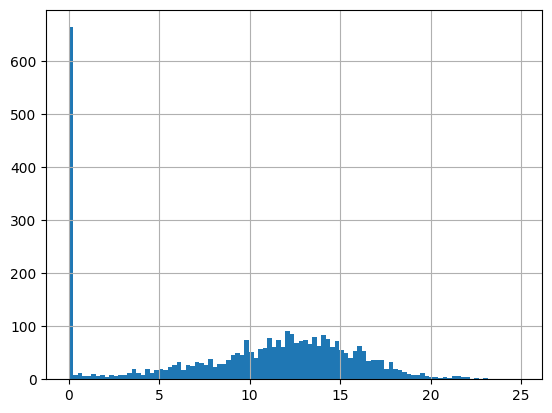

In [3]:
log_tvl = np.log1p(df['tvl'])
log_tvl.hist(bins=100);

There's a high concentration of data points at 0. Let's check exactly how many.

In [4]:
(log_tvl == 0).mean()

0.1728149829738933

So ~17.3% data have 0 TVL. We want to drop them. Let's first clip the data at 
17.3% and 99.5%, in other words, let's replace the values outside of 17.3% and 
99.5% of the data body with the values at 17.3% and 99.5% percentiles. 

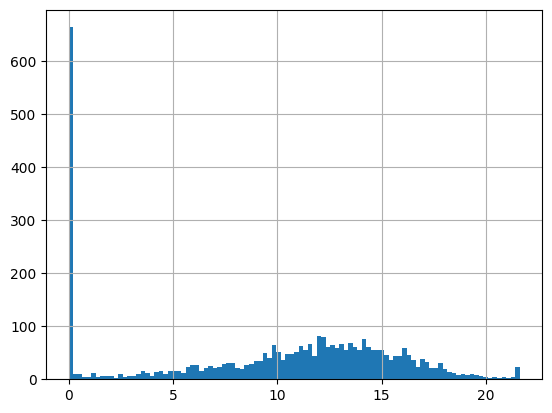

In [5]:
lwr, upr = log_tvl.quantile(0.173), log_tvl.quantile(0.995)
log_tvl_clipped = log_tvl.clip(lower=lwr, upper=upr)
log_tvl_clipped.hist(bins=100);

Let's now remove data points outside of 17.3% and 99.5% of the data body.

In [6]:
is_lwr = log_tvl_clipped == lwr
is_upr = log_tvl_clipped == upr
in_between = log_tvl_clipped.between(lwr, upr, inclusive='neither')
assert is_lwr.sum() + is_upr.sum() + in_between.sum() == len(log_tvl_clipped)

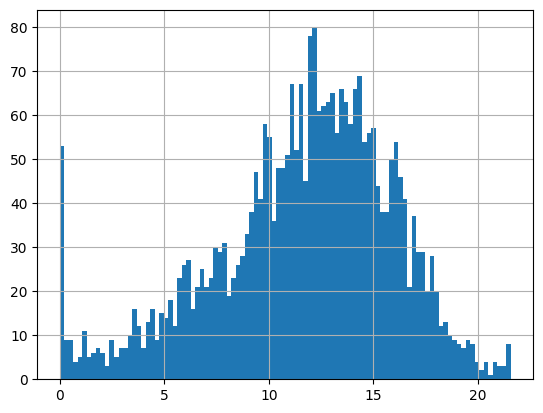

In [7]:
log_tvl_cleaned = log_tvl_clipped[in_between]
log_tvl_cleaned.hist(bins=100);

It looks like both tails still contain "outliers," and we can repeat the process to remove them.

### Referral

- Digital Ocean is a cloud computing platform where you can rent remote servers for cheap. 
  I have my remote data science server there. You can do the same and [get $200 credit](https://m.do.co/c/0a435cb96813). 